We can tweak the model by playing with mutation strength and the black hole formation model. By doing this, we can test the validity of the CNS model by introducing more complex models that could reflect real world multiverse dynamics.

In [75]:
import numpy as np

class Universe:
    def __init__(self, character_type, generation=0):
        self.character_type = character_type
        self.black_holes = self.form_black_holes()
        self.generation = generation

    def form_black_holes(self, character_type=None):
        if character_type is None:
            character_type = self.character_type
        return int(np.sum(np.dot(black_hole_matrix, self.character_type)))

    def produce_daughter_universe(self):
        # The daughter universe inherits the character type with some variation
        mutation_factor = max(0.0, 5 * np.sin(self.generation / 5))
        mutation_strength = np.random.normal(0, mutation_factor * 0.1, len(self.character_type))
        new_character_type = self.character_type + mutation_strength
        return Universe(new_character_type, self.generation + 1)

class Multiverse:
    def __init__(self, initial_universes):
        self.generations = [[Universe(np.random.normal(0, 1, 10)) for _ in range(initial_universes)]]

    def truncation_selection(self, current_generation, truncation_ratio=0.5):
        # Sort the current generation by fitness (number of black holes)
        sorted_generation = sorted(current_generation, key=lambda u: u.black_holes, reverse=True)
        
        # Select the top percentage of universes
        num_selected = int(len(sorted_generation) * truncation_ratio)
        return sorted_generation[:num_selected]
    
    def top_selection(self, current_generation, top_number=5):
        # Sort the current generation by fitness (number of black holes)
        sorted_generation = sorted(current_generation, key=lambda u: u.black_holes, reverse=True)
        
        # Select the top number of universes
        return sorted_generation[:top_number]

    def next_generation(self):
        new_generation = []
        current_generation = self.generations[-1]
        
        # Perform truncation selection to choose universes for reproduction
        selected_universes = self.top_selection(current_generation)

        for universe in selected_universes:
            # Each selected universe can produce offspring proportional to its black holes
            for _ in range(universe.black_holes):
                new_generation.append(universe.produce_daughter_universe())

        self.generations.append(new_generation)

black_hole_matrix = np.random.normal(0, 1, (10, 10))

mv = Multiverse(10)

print(len(mv.generations[-1]))
for _ in range(500):
    print(_, len(mv.generations[-1]))
    mv.next_generation()
print(len(mv.generations[-1]))

10
0 10
1 21
2 40
3 43
4 51
5 67
6 88
7 120
8 151
9 183
10 218
11 260
12 304
13 343
14 373
15 393
16 407
17 411
18 415
19 415
20 415
21 415
22 415
23 415
24 415
25 415
26 415
27 415
28 415
29 415
30 415
31 415
32 415
33 415
34 420
35 430
36 451
37 481
38 519
39 566
40 607
41 663
42 707
43 754
44 794
45 830
46 862
47 883
48 895
49 895
50 895
51 895
52 895
53 895
54 895
55 895
56 895
57 895
58 895
59 895
60 895
61 895
62 895
63 895
64 895
65 895
66 905
67 925
68 951
69 983
70 1015
71 1063
72 1108
73 1151
74 1194
75 1239
76 1278
77 1306
78 1333
79 1350
80 1356
81 1360
82 1360
83 1360
84 1360
85 1360
86 1360
87 1360
88 1360
89 1360
90 1360
91 1360
92 1360
93 1360
94 1360
95 1360
96 1360
97 1365
98 1381
99 1407
100 1444
101 1483
102 1525
103 1578
104 1629
105 1679
106 1723
107 1770
108 1808
109 1836
110 1855
111 1862
112 1865
113 1865
114 1865
115 1865
116 1865
117 1865
118 1865
119 1865
120 1865
121 1865
122 1865
123 1865
124 1865
125 1865
126 1865
127 1865
128 1865
129 1875
130 1895
131 1

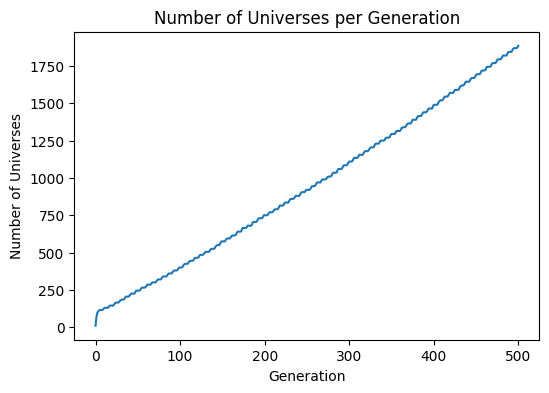

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
generation_counts = [len(generation) for generation in mv.generations]
plt.plot(generation_counts)
plt.xlabel('Generation')
plt.ylabel('Number of Universes')
plt.title('Number of Universes per Generation')
plt.show()


(501, 10)


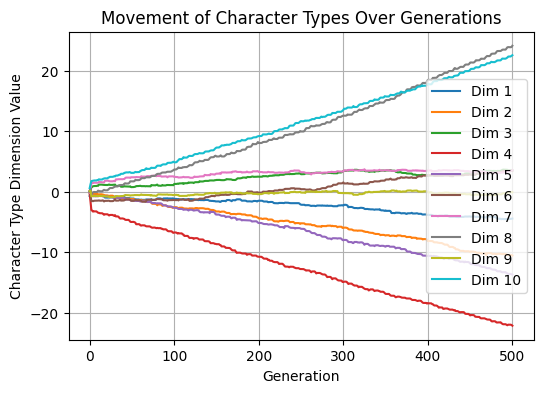

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'Multiverse' class has a method to return all character types of a generation
# and 'universe' objects have a 'character_type' attribute which is a list of N character values.

character_type_movement = []

for generation in mv.generations:
    # Extract character types for all universes in the current generation
    character_types = [universe.character_type for universe in generation]
    # Assuming character types are 2-dimensional for visualization
    character_types = np.array(character_types)
    # Calculate the mean of each character type dimension for the current generation
    mean_character_type = np.mean(character_types, axis=0)
    character_type_movement.append(mean_character_type)

# Convert the list to a NumPy array for easy slicing
character_type_movement = np.array(character_type_movement)

print(character_type_movement.shape)

plt.figure(figsize=(6, 4))
for i in range(character_type_movement.shape[1]):
    plt.plot(range(len(character_type_movement)), character_type_movement[:, i], label=f'Dim {i+1}')
plt.xlabel('Generation')
plt.ylabel('Character Type Dimension Value')
plt.title('Movement of Character Types Over Generations')
plt.legend()
plt.grid(True)
plt.show()


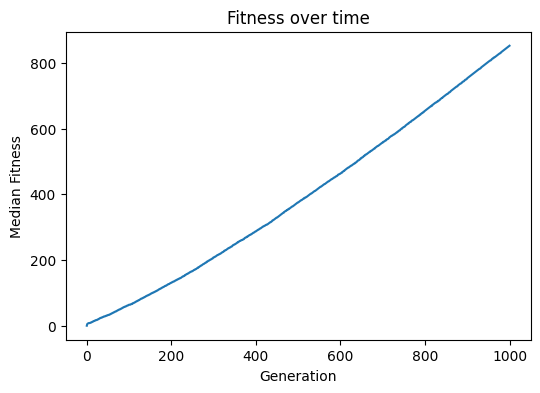

In [31]:
# Assuming 'current_generation' is available and has attribute 'black_holes' for fitness
median_fitness_values = []

for current_generation in mv.generations:
    fitness_values = np.median([universe.black_holes for universe in current_generation])
    median_fitness_values.append(fitness_values)

plt.figure(figsize=(6,4))
plt.plot(median_fitness_values)
plt.xlabel('Generation')
plt.ylabel('Median Fitness')
plt.title('Fitness over time')
plt.show()


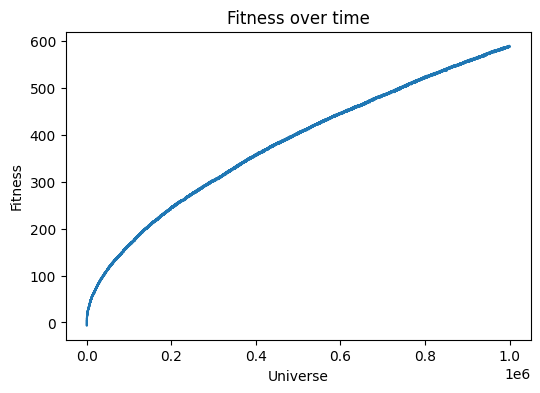

In [29]:
# Assuming 'current_generation' is available and has attribute 'black_holes' for fitness
all_fitness_values = []

for current_generation in mv.generations:
    fitness_values = [universe.black_holes for universe in current_generation]
    all_fitness_values.extend(fitness_values)

plt.figure(figsize=(6,4))
plt.plot(all_fitness_values[:1000000])
plt.xlabel('Universe')
plt.ylabel('Fitness')
plt.title('Fitness over time')
plt.show()
